# Data Science 2: Multivariate Component Analysis Exam, 05 July 2022
 - Date: 05-July-2022
 - Student: Parvej Chowdhury
 - Student ID: 434653


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.manifold import MDS
import sklearn.datasets as dt
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# for data visualization
import plotly.express as px
import matplotlib.cm as cm

import warnings
warnings.filterwarnings('ignore')

# 1. Dataset: Lysozyme

The dataset file **lysozyme_rmsds.csv** contains a distance matrix of a selection of lysozyme structures from the Protein DataBank (PDB). Lysozyme is one of the most used/studied proteins, with >5400 structures available in the database. Distances were determined as root-mean-square deviation (RMSD) after least-squares alignment using the CE align algorithm.

**Multidimensional Scaling (MDS)** is a technique that allows us to reduce the dimensions of the data whilst still preserving the distances and dissimilarities between samples. It is a non-linear technique for embedding data in lower-dimensional space. This makes it possible to make a distinction between the different variants easier.

This lysozyme dataset contains the distance matrix of a selection of lysozyme structures. My aim is to see whether any clusters are formed based on their shapes/coordenates, Multidimensional scaling would be an appropriate technique. 

## Loading, inspecting and processing the data

In [20]:
df_lysozyme = pd.read_csv('lysozyme_rmsds.csv', sep=',')
df_lysozyme.head(5)
# df_lysozyme.shape

,Unnamed: 0,1ta0,5m1y,1flq,4ru1,1uia,3ma8,2zc6,4m53,1cwv,...,5dla,4u2a,6fe3,4ws6,225l,1l17,4zee,5hmj,4qdn,4x6p
0,1ta0,0.000000,9.944671,10.914137,5.368414,10.147917,6.330169,13.397298,4.796260,6.708178,...,10.748649,4.697932,6.442754,5.967243,6.613105,6.550033,10.885024,10.758552,10.531178,7.134530
1,5m1y,9.944671,0.000000,0.351689,8.778090,0.360542,6.532751,6.447437,11.661980,10.892651,...,0.450633,6.518186,10.142028,8.008221,5.411168,5.225135,0.423226,0.382607,4.660109,6.716681
2,1flq,10.914137,0.351689,0.000000,8.781974,0.201154,5.892352,6.476417,10.141856,8.676370,...,0.300225,6.862653,8.398187,8.305965,5.385658,5.390587,0.312325,0.241490,4.646545,6.584307
3,4ru1,5.368414,8.778090,8.781974,0.000000,8.802099,6.510888,11.596014,6.613473,6.483236,...,10.002309,9.219876,8.978669,5.131378,8.586637,9.308215,7.545538,9.995192,11.135262,10.210994
4,1uia,10.147917,0.360542,0.201154,8.802099,0.000000,8.169978,6.458828,11.358191,10.635841,...,0.296834,7.002353,11.221244,10.178038,5.404494,5.409590,0.333920,0.247616,4.522474,6.734468


Columns **'Unnamed: 0'** does not contain any significant information. Hence this column is not required for our investigation, I am going to drop this column. 

In [ ]:
df_lysozyme = df_lysozyme.drop(columns=['Unnamed: 0'], axis=1)

In [ ]:
df_lysozyme.head()

In [5]:
# After deleting the column, lets check the shape of the dataset
print("Shape of the dataset:", df_lysozyme.shape)

Shape of the dataset: (172, 172)


In [6]:
# Checking for null values
print("Total NULL values in the dataset:", df_lysozyme.isnull().sum().sum())

Total NULL values in the dataset: 0


**Now it seems the dataset is clear and there is no NULL value.**

In [7]:
df_lysozyme.describe()

,1ta0,5m1y,1flq,4ru1,1uia,3ma8,2zc6,4m53,1cwv,6nup,...,5dla,4u2a,6fe3,4ws6,225l,1l17,4zee,5hmj,4qdn,4x6p
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,...,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,8.036919,6.388850,6.318031,7.842816,6.312647,8.072835,7.653471,7.852616,8.306167,8.176573,...,6.231414,7.522106,8.503638,7.898512,6.406067,6.430737,6.358953,6.239349,6.640808,8.261526
std,2.213574,3.440428,3.429335,1.847217,3.430601,2.391028,1.897116,2.147198,1.837843,2.125762,...,3.346811,1.456069,1.920008,1.766548,2.994734,2.996154,3.415427,3.379766,2.175881,2.157962
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.523725,5.116153,5.037334,6.311903,5.123895,6.011803,6.485349,6.117363,7.142767,6.246024,...,5.294430,6.734974,7.127571,6.715068,5.405806,5.407561,5.080435,5.112808,4.880142,6.754290
50%,7.453511,6.877664,6.800721,7.949098,6.745680,7.609880,7.432059,7.402749,8.464008,8.384525,...,6.781129,7.417251,8.400959,7.996756,6.696565,6.693226,6.980725,6.778710,5.884252,7.787650
75%,10.215548,9.128679,9.017460,9.306795,8.804445,9.619301,8.675533,9.861910,9.618126,9.631722,...,8.303838,8.251927,9.782955,9.210807,8.392679,8.516926,8.775682,8.818425,8.246352,9.751182
max,13.397298,13.090482,12.598936,12.234976,12.914645,12.815619,13.400449,12.809534,12.306097,13.123021,...,12.423120,12.121846,14.339375,11.865446,12.260640,12.252623,12.902373,12.589769,12.408708,12.366853


In [8]:
X = df_lysozyme.values
# y = df_metabolom['Species'].values

# X
# len(X)

To do multidimensional scaling we will use the stress levels and determine what the best stress level is. I use random samples from the dataset, to make sure it can be calculated quickly.

In [9]:
X_sample = X.copy()
X_sample

np.random.shuffle(X_sample)
X_sample = X_sample[::]

# X_sample

In [10]:
stress = []
for i in range(1, 20):
    model = MDS(n_components=i)
    
    pts = model.fit_transform(X)
    
    stress.append(model.stress_)

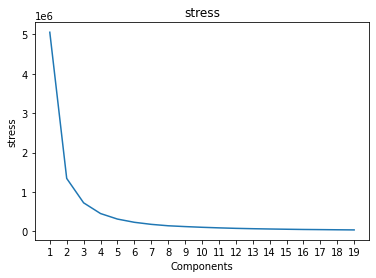

In [11]:
plt.plot(range(1, 20), stress)
plt.xticks(range(1, 20))
plt.title('stress')
plt.ylabel('stress')
plt.xlabel('Components')
plt.show()

Although the sklearn stress is plotted, it is recommended to use the Kruskal's stress. However, due to time constraints I chose the sklearn stress. We can see that 3 dimensions is descent, but the more dimensions the better in this context. For visualization purposes I'll go with the 2 and 3 dimensions. 

In [12]:
# Dissimilarity measure to use:

# ‘euclidean’:
# Pairwise Euclidean distances between points in the dataset.

# ‘precomputed’:
# Pre-computed dissimilarities are passed directly to fit and fit_transform.

mds = MDS(n_components=2, random_state=0, dissimilarity='euclidean')
pts = mds.fit_transform(X)

In [13]:
# 3d embedding
mds = MDS(n_components=3, random_state=0, dissimilarity='euclidean')
pts_3d = mds.fit_transform(X)


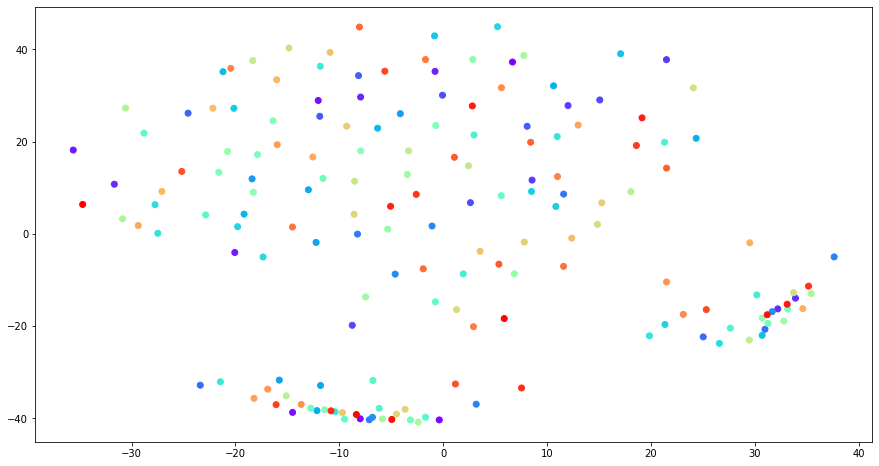

In [14]:
colors = ['r', 'g', 'b', 'c', 'm']
colors = cm.rainbow(np.linspace(0, 1, len(pts)))

fig = plt.figure(figsize=(15, 8))
plt.scatter(pts[:,0], pts[:,1], c=colors)
plt.show()

In [18]:
# Create a 3D scatter plot
fig = px.scatter_3d(None, x=pts_3d[:,0], y=pts_3d[:,1], z=pts_3d[:,2], color=pts_3d[:,0])

# Update chart looks
fig.update_layout(showlegend=False,
                  scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                        center=dict(x=0, y=0, z=-0.1),
                                        eye=dict(x=1.25, y=1.5, z=1)),
                                        margin=dict(l=0, r=0, b=0, t=0),
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         ),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                          ),
                               zaxis=dict(backgroundcolor='lightgrey',
                                          color='black', 
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         )))

# Update marker size
fig.update_traces(marker=dict(size=5, line=dict(color='black', width=0.1)))

fig.update(layout_coloraxis_showscale=False)
fig.show()

As can be seen in the 2D plot, there are several clusters. Each lysozyme has its own place in the 2D space. This means that lysozyme can be categorized by their position.

In the 3D plot we can also clearly see that the lysozyme are grouped.

## Conclusion

We can see that the distance of the lysozyme structures are in the Cartesian space. Therefore, we can take it a step further and predict the lysozyme structures in this space.

The expectation that different variants can be distinguised in term of conformation and dynamics seems to be correct. However, the data can be analysed even more, by integrating domain knowledge. It may be that a difference dissimilarity metric gives a different result.

<font color='red'>
   Assessment: The idea was good, but since a distance matrix was given, you can't make a selection of rows and the only proper approach was using dissimilarity='precomputed'. The results show dispersed points, which do not warrant the conclusions you draw. You should've noted the two clusters at the bottom of the cloud of points, which suggest there are many structures that are grouped there. The colors used in the graph make little sense; the dataset has no specific ordering.
</font>

- give the rationale for using the method for the data selected and state expectations (20%) 20
- justify the selections (rows/columns) and/or treatment of the data (15%) 0
- explain/justify the choices made in the application of the method (15%) 0
- plot the results in a clear and logical manner (20%) 10
- interpret and reflect on the results (30%) 0


